In [182]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScalers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [183]:
df1 = pd.read_csv("customer_support_tickets.csv")
df1.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [184]:
df= df1.copy()

In [185]:
df.shape

(8469, 17)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [187]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [188]:
df.duplicated().sum()

0

In [189]:
df.describe()


,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [190]:
df.corr(numeric_only = True)

,Ticket ID,Customer Age,Customer Satisfaction Rating
Ticket ID,1.000000,0.007395,-0.014213
Customer Age,0.007395,1.000000,-0.003700
Customer Satisfaction Rating,-0.014213,-0.003700,1.000000


In [191]:
df['Ticket Description'].value_counts

<bound method IndexOpsMixin.value_counts of 0       I'm having an issue with the {product_purchase...
1       I'm having an issue with the {product_purchase...
2       I'm facing a problem with my {product_purchase...
3       I'm having an issue with the {product_purchase...
4       I'm having an issue with the {product_purchase...
                              ...                        
8464    My {product_purchased} is making strange noise...
8465    I'm having an issue with the {product_purchase...
8466    I'm having an issue with the {product_purchase...
8467    I'm having an issue with the {product_purchase...
8468    There seems to be a hardware problem with my {...
Name: Ticket Description, Length: 8469, dtype: object>

In [192]:
df = df.drop(columns = ['Ticket ID','Customer Name','Customer Email','Resolution'])

In [193]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [194]:
df['Customer Gender'].unique()

array(['Other', 'Female', 'Male'], dtype=object)

In [195]:
df['Ticket Type'].unique()

array(['Technical issue', 'Billing inquiry', 'Cancellation request',
       'Product inquiry', 'Refund request'], dtype=object)

In [196]:
df['Ticket Subject'].unique()

array(['Product setup', 'Peripheral compatibility', 'Network problem',
       'Account access', 'Data loss', 'Payment issue', 'Refund request',
       'Battery life', 'Installation support', 'Software bug',
       'Hardware issue', 'Product recommendation', 'Delivery problem',
       'Display issue', 'Cancellation request', 'Product compatibility'],
      dtype=object)

In [197]:
df['Ticket Priority'].unique()

array(['Critical', 'Low', 'High', 'Medium'], dtype=object)

In [198]:
df['Ticket Channel'].unique()

array(['Social media', 'Chat', 'Email', 'Phone'], dtype=object)

In [199]:
df['Ticket Description'].unique()

array(["I'm having an issue with the {product_purchased}. Please assist.\n\nYour billing zip code is: 71701.\n\nWe appreciate that you have requested a website address.\n\nPlease double check your email address. I've tried troubleshooting steps mentioned in the user manual, but the issue persists.",
       "I'm having an issue with the {product_purchased}. Please assist.\n\nIf you need to change an existing product.\n\nI'm having an issue with the {product_purchased}. Please assist.\n\nIf The issue I'm facing is intermittent. Sometimes it works fine, but other times it acts up unexpectedly.",
       "I'm facing a problem with my {product_purchased}. The {product_purchased} is not turning on. It was working fine until yesterday, but now it doesn't respond.\n\n1.8.3 I really I'm using the original charger that came with my {product_purchased}, but it's not charging properly.",
       ...,
       "I'm having an issue with the {product_purchased}. Please assist. You are using a different b

In [200]:
df.groupby('Ticket Channel')['Ticket Channel'].count()

Ticket Channel
Chat            2073
Email           2143
Phone           2132
Social media    2121
Name: Ticket Channel, dtype: int64

In [201]:
df['Product Purchased'].unique()

array(['GoPro Hero', 'LG Smart TV', 'Dell XPS', 'Microsoft Office',
       'Autodesk AutoCAD', 'Microsoft Surface', 'Philips Hue Lights',
       'Fitbit Versa Smartwatch', 'Dyson Vacuum Cleaner',
       'Nintendo Switch', 'Microsoft Xbox Controller',
       'Nintendo Switch Pro Controller', 'Nest Thermostat',
       'Sony PlayStation', 'GoPro Action Camera', 'Xbox',
       'LG Washing Machine', 'Canon EOS', 'HP Pavilion', 'Amazon Kindle',
       'Lenovo ThinkPad', 'Fitbit Charge', 'Adobe Photoshop',
       'Google Pixel', 'Amazon Echo', 'PlayStation', 'Samsung Galaxy',
       'iPhone', 'LG OLED', 'Sony Xperia', 'Apple AirPods',
       'Sony 4K HDR TV', 'Canon DSLR Camera', 'Roomba Robot Vacuum',
       'Nikon D', 'Bose QuietComfort', 'Samsung Soundbar', 'Asus ROG',
       'Bose SoundLink Speaker', 'Google Nest', 'Garmin Forerunner',
       'MacBook Pro'], dtype=object)

In [202]:
df['Customer Satisfaction Rating'].value_counts()

Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64

In [203]:
df.groupby('Product Purchased')['Product Purchased'].count()

Product Purchased
Adobe Photoshop                   181
Amazon Echo                       221
Amazon Kindle                     198
Apple AirPods                     213
Asus ROG                          187
Autodesk AutoCAD                  196
Bose QuietComfort                 190
Bose SoundLink Speaker            197
Canon DSLR Camera                 206
Canon EOS                         240
Dell XPS                          185
Dyson Vacuum Cleaner              198
Fitbit Charge                     202
Fitbit Versa Smartwatch           191
Garmin Forerunner                 208
GoPro Action Camera               183
GoPro Hero                        228
Google Nest                       198
Google Pixel                      203
HP Pavilion                       200
LG OLED                           213
LG Smart TV                       219
LG Washing Machine                208
Lenovo ThinkPad                   183
MacBook Pro                       186
Microsoft Office                

In [204]:
df['First Response Time'] = pd.to_datetime(df['First Response Time'],errors = 'coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')

In [205]:
df.dtypes

Customer Age                             int64
Customer Gender                         object
Product Purchased                       object
Date of Purchase                datetime64[ns]
Ticket Type                             object
Ticket Subject                          object
Ticket Description                      object
Ticket Status                           object
Ticket Priority                         object
Ticket Channel                          object
First Response Time             datetime64[ns]
Time to Resolution              datetime64[ns]
Customer Satisfaction Rating           float64
dtype: object

In [206]:
df['Resolution duration'] = (df['Time to Resolution']-df['First Response Time']).dt.total_seconds() /3600
df['Product_age_ticket_raised'] = (df['First Response Time']-df['Date of Purchase']).dt.days/365

In [207]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution duration,Product_age_ticket_raised
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,2023-06-01 12:15:36,NaT,NaN,NaN,2.194521
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,2023-06-01 16:45:38,NaT,NaN,NaN,2.027397
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.850000,2.882192
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-5.533333,2.547945
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.683333,3.323288


In [208]:
df['Resolution duration'] = df['Resolution duration'].apply(lambda x: np.nan if x < 0 else x)


In [209]:
median_purchase = df['Date of Purchase'].mean(skipna=True)
median_first_response = df['First Response Time'].mean(skipna=True)
median_Time_to_resolution =df['Time to Resolution'].mean(skipna=True)
median_resolution_duration= df['Resolution duration'].mean(skipna=True)
median_product_age= df['Product_age_ticket_raised'].mean(skipna=True)

In [210]:
'''df['Resolution duration'] = (df['Time to Resolution']-df['First Response Time']).dt.total_seconds() /3600
df['Product_age_ticket_raised'] = (df['First Response Time']-df['Date of Purchase']).dt.days/365'''


"df['Resolution duration'] = (df['Time to Resolution']-df['First Response Time']).dt.total_seconds() /3600\ndf['Product_age_ticket_raised'] = (df['First Response Time']-df['Date of Purchase']).dt.days/365"

In [211]:
df['Date of Purchase'] = df['Date of Purchase'].fillna(median_purchase)
df['First Response Time']= df['First Response Time'].fillna(median_first_response)
df['Time to Resolution']= df['Time to Resolution'].fillna(median_Time_to_resolution)
df['Product_age_ticket_raised']= df['Product_age_ticket_raised'].fillna(median_product_age)
df['Resolution duration']= df['Resolution duration'].fillna(median_resolution_duration)

In [212]:
df.isnull().sum()

Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Ticket Priority                    0
Ticket Channel                     0
First Response Time                0
Time to Resolution                 0
Customer Satisfaction Rating    5700
Resolution duration                0
Product_age_ticket_raised          0
dtype: int64

In [213]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution duration,Product_age_ticket_raised
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:21.509931520,NaN,7.577932,2.194521
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:21.509931520,NaN,7.577932,2.027397
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38.000000000,3.0,6.850000,2.882192
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40.000000000,3.0,7.577932,2.547945
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42.000000000,1.0,19.683333,3.323288


In [214]:
df['Customer Satisfaction Rating'] = df.groupby('Ticket Priority')['Customer Satisfaction Rating'].transform(lambda x: x.fillna(x.mode()[0]))


In [215]:
df.isnull().sum()

Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
Resolution duration             0
Product_age_ticket_raised       0
dtype: int64

In [216]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution duration,Product_age_ticket_raised
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:21.509931520,1.0,7.577932,2.194521
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:21.509931520,1.0,7.577932,2.027397
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38.000000000,3.0,6.850000,2.882192
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40.000000000,3.0,7.577932,2.547945
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42.000000000,1.0,19.683333,3.323288


In [217]:
df['Resolution duration'] = (df['Time to Resolution']-df['First Response Time']).dt.total_seconds() /3600
df['Product_age_ticket_raised'] = (df['First Response Time']-df['Date of Purchase']).dt.days/365

In [218]:
median_resolution_duration= df['Resolution duration'].mean(skipna=True)
median_product_age= df['Product_age_ticket_raised'].mean(skipna=True)
df['Product_age_ticket_raised']= df['Product_age_ticket_raised'].fillna(median_product_age)
df['Resolution duration'] = df['Resolution duration'].apply(lambda x: np.nan if x < 0 else x)
df['Resolution duration']= df['Resolution duration'].fillna(median_resolution_duration)

In [219]:
df['First_Response_year'] = df['First Response Time'].dt.year
df['First_Response_month'] = df['First Response Time'].dt.month
df['First_Response_day'] = df['First Response Time'].dt.dayofweek
df['First_Response_hour'] = df['First Response Time'].dt.hour

df['Resolved year'] = df['Time to Resolution'].dt.year
df['Resolved month'] = df['Time to Resolution'].dt.month
df['Resolved day'] = df['Time to Resolution'].dt.dayofweek
df['Resolved hour'] = df['Time to Resolution'].dt.hour

df['Purchased_year'] = df['Date of Purchase'].dt.year
df['Purchased_month'] = df['Date of Purchase'].dt.month
df['Purchased_day'] = df['Date of Purchase'].dt.dayofweek



In [220]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,...,First_Response_month,First_Response_day,First_Response_hour,Resolved year,Resolved month,Resolved day,Resolved hour,Purchased_year,Purchased_month,Purchased_day
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,...,6,3,12,2023,6,3,11,2021,3,0
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,...,6,3,16,2023,6,3,11,2021,5,5
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,...,6,3,11,2023,6,3,18,2020,7,1
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,...,6,3,7,2023,6,3,1,2020,11,4
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,...,6,3,0,2023,6,3,19,2020,2,1


EDA

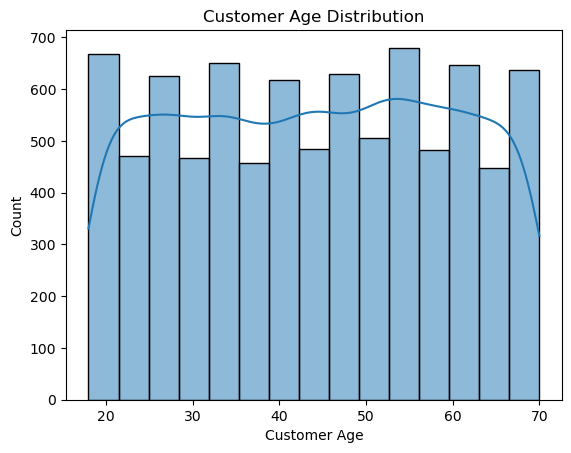

In [222]:
#Customer Age Dplt.figure(figsize=(6,4))
sns.histplot(df['Customer Age'], bins=15, kde=True)
plt.title("Customer Age Distribution")
plt.show()


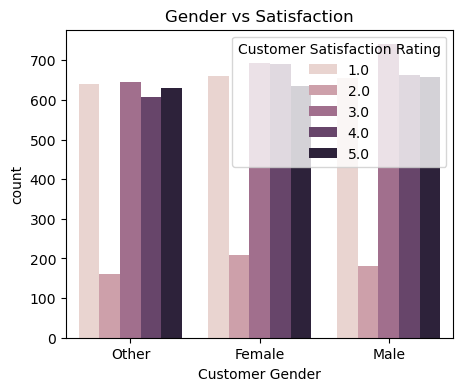

In [223]:
#Customer Gender vs Satisfaction Rating
plt.figure(figsize=(5,4))
sns.countplot(x='Customer Gender',hue='Customer Satisfaction Rating',data=df)
plt.title("Gender vs Satisfaction")
plt.show()


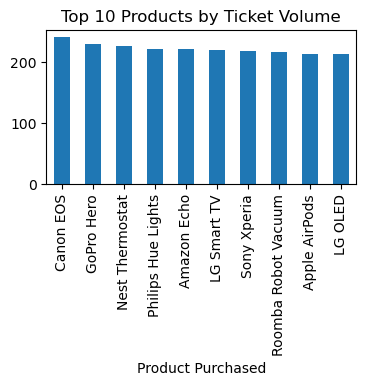

In [224]:
#Top products by Ticket count
plt.figure(figsize=(4,2))
df['Product Purchased'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Products by Ticket Volume")
plt.show()


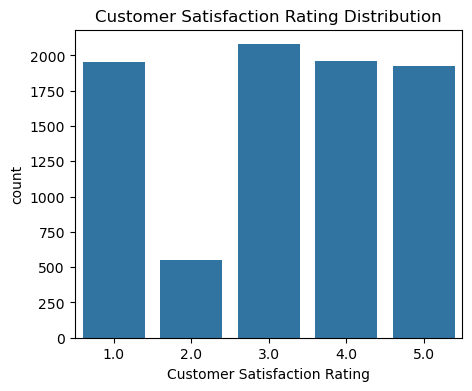

In [225]:
#Customer Satisfaction Rating Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Customer Satisfaction Rating', data=df)
plt.title("Customer Satisfaction Rating Distribution")
plt.show()

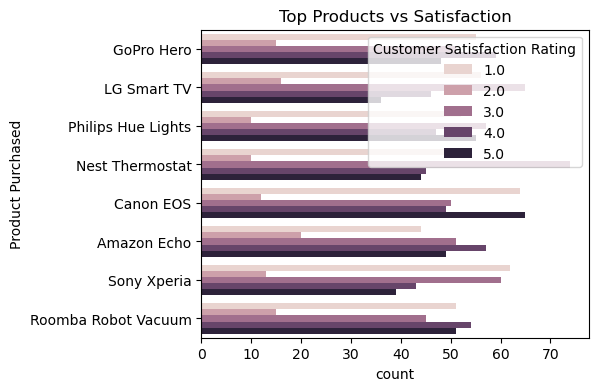

In [226]:
#Top products vs Satisfacttion
top_products = df['Product Purchased'].value_counts().head(8).index
plt.figure(figsize=(5,4))
sns.countplot(data=df[df['Product Purchased'].isin(top_products)],y='Product Purchased',hue='Customer Satisfaction Rating')
plt.title("Top Products vs Satisfaction")
plt.show()


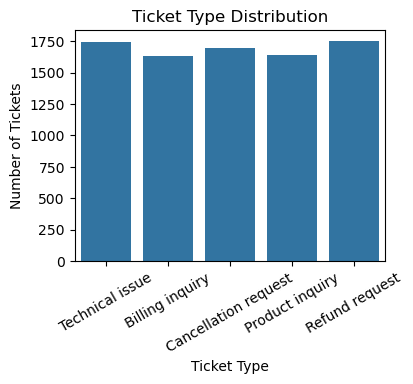

In [227]:
#Ticket type distribution
plt.figure(figsize=(4,3))
sns.countplot(x='Ticket Type',data=df)
plt.title("Ticket Type Distribution")
plt.xlabel("Ticket Type")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=30)
plt.show()


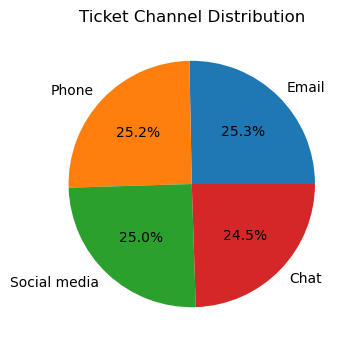

In [228]:
#Ticket channel Distribution
plt.figure(figsize=(4,4))
df['Ticket Channel'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Ticket Channel Distribution")
plt.ylabel("")  
plt.show()


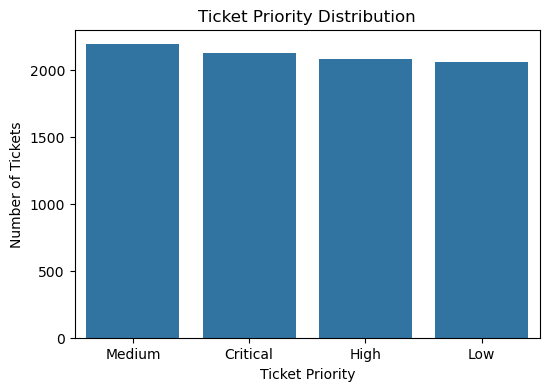

In [229]:
#Ticket Priority Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Ticket Priority',data=df,order=df['Ticket Priority'].value_counts().index)
plt.title("Ticket Priority Distribution")
plt.xlabel("Ticket Priority")
plt.ylabel("Number of Tickets")
plt.show()


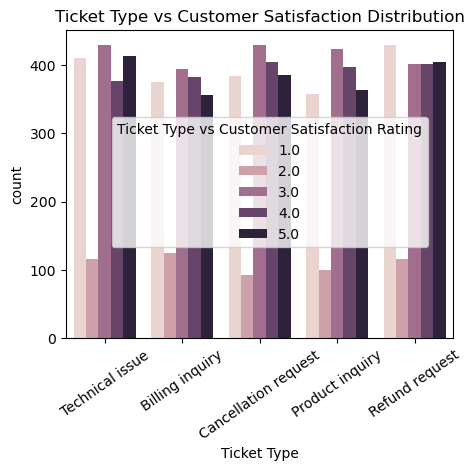

In [230]:
plt.figure(figsize=(5,4))
sns.countplot(x='Ticket Type',hue='Customer Satisfaction Rating',
    data=df
)
plt.legend(title="Ticket Type vs Customer Satisfaction Rating",bbox_to_anchor=(0.1,0.74),loc='upper left')
plt.xticks(rotation=35)
plt.title("Ticket Type vs Customer Satisfaction Distribution")
plt.show()


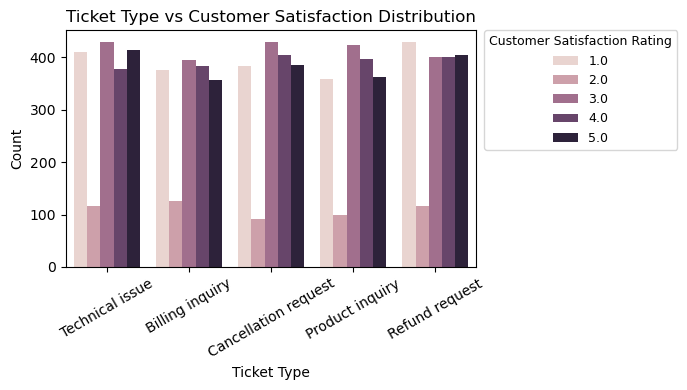

In [231]:
#Ticket Type vs Customer Satisfaction Distribution
plt.figure(figsize=(7,4))

ax = sns.countplot(x='Ticket Type',hue='Customer Satisfaction Rating',data=df)

plt.title("Ticket Type vs Customer Satisfaction Distribution")
plt.xlabel("Ticket Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
ax.legend(title="Customer Satisfaction Rating",bbox_to_anchor=(1.02, 1),loc='upper left',borderaxespad=0,fontsize=9,title_fontsize=9)
plt.tight_layout()
plt.show()


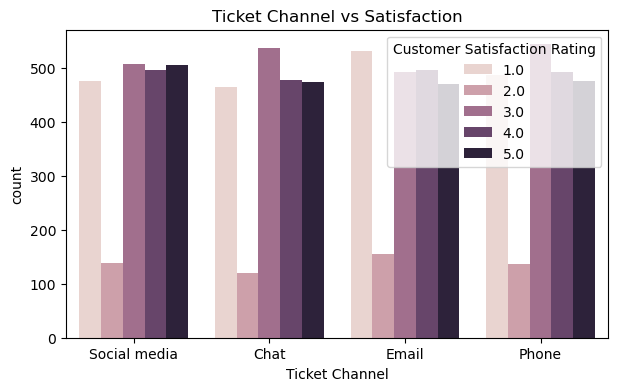

In [232]:
#Ticket Channel vs Satisfaction
plt.figure(figsize=(7,4))
sns.countplot(x='Ticket Channel',hue='Customer Satisfaction Rating',data=df)
plt.title("Ticket Channel vs Satisfaction")
ax.legend(
    title="Customer Satisfaction Rating",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=9,
    title_fontsize=9
)

plt.show()


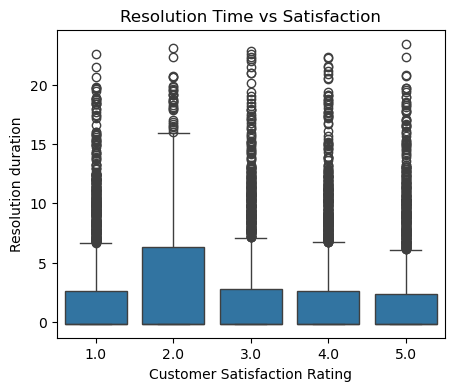

In [233]:
#Resolution Time vs Satisfaction
plt.figure(figsize=(5,4))
sns.boxplot(x='Customer Satisfaction Rating', y='Resolution duration', data=df)
plt.title('Resolution Time vs Satisfaction')
plt.show()

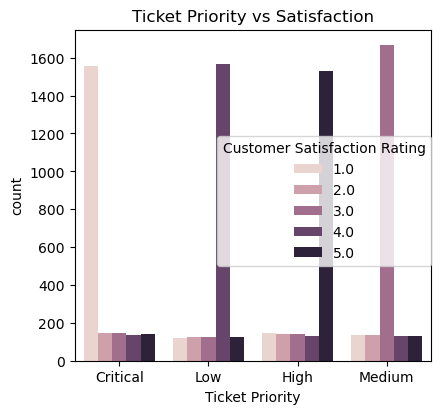

In [234]:
#Ticket Priority vs Satisfaction
plt.figure(figsize=(4.6,4.3))
sns.countplot(x='Ticket Priority',hue='Customer Satisfaction Rating',data=df)
plt.legend(
    title="Customer Satisfaction Rating",
    bbox_to_anchor=(0.38,0.7),
    loc='upper left'
)
plt.title("Ticket Priority vs Satisfaction")
plt.show()


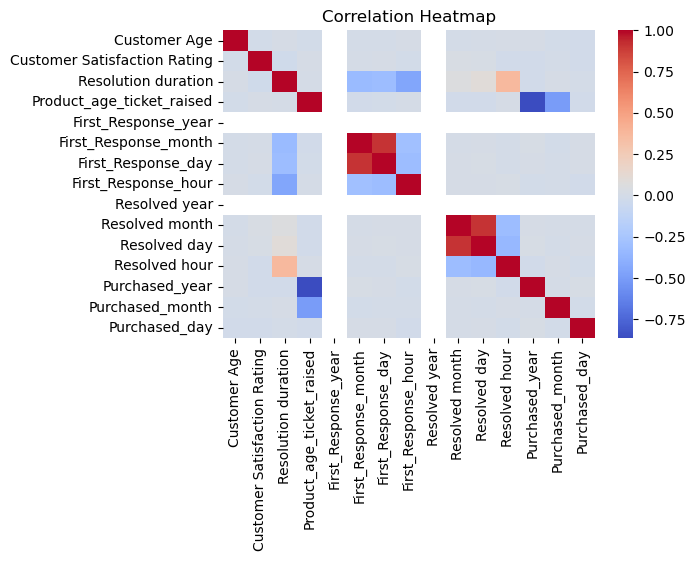

In [235]:
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(6,4))
sns.heatmap(numeric_cols.corr(),cmap='coolwarm',annot=False)
plt.title("Correlation Heatmap")
plt.show()


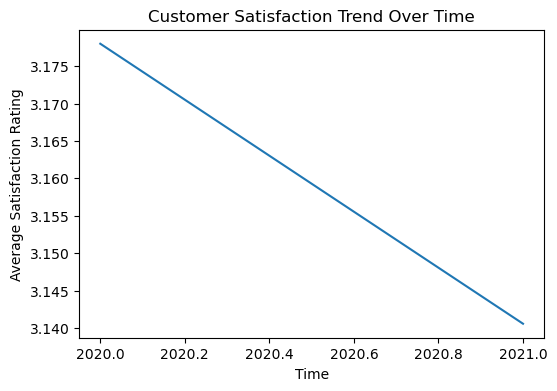

In [236]:
time_trend = df.groupby('Purchased_year')['Customer Satisfaction Rating'].mean()
plt.figure(figsize=(6,4))
time_trend.plot()
plt.title("Customer Satisfaction Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Average Satisfaction Rating")
plt.show()


In [237]:
'''top_10_products = (df.groupby('Product Purchased')['Customer Satisfaction Rating'].mean().sort_values(ascending=False).head(10))
plt.figure(figsize=(8,4))

top_10_products.sort_values().plot(kind='barh',color='steelblue')

plt.title("Top 10 Products with Highest Average Customer Satisfaction")
plt.xlabel("Average Customer Satisfaction Rating")
plt.ylabel("Product Purchased")
plt.show()'''


'top_10_products = (df.groupby(\'Product Purchased\')[\'Customer Satisfaction Rating\'].mean().sort_values(ascending=False).head(10))\nplt.figure(figsize=(8,4))\n\ntop_10_products.sort_values().plot(kind=\'barh\',color=\'steelblue\')\n\nplt.title("Top 10 Products with Highest Average Customer Satisfaction")\nplt.xlabel("Average Customer Satisfaction Rating")\nplt.ylabel("Product Purchased")\nplt.show()'

In [238]:
X = df.drop(columns = ['Customer Satisfaction Rating'])
y = df['Customer Satisfaction Rating'] - 1


In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [240]:
y_train.value_counts(normalize=True)


Customer Satisfaction Rating
2.0    0.244280
0.0    0.232472
3.0    0.229225
4.0    0.229077
1.0    0.064945
Name: proportion, dtype: float64

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=100,
    ngram_range=(1,2),
    min_df=10,
    stop_words='english'
)
X_train_tfidf = tfidf.fit_transform(X_train['Ticket Description'])
X_test_tfidf  = tfidf.transform(X_test['Ticket Description'])

In [242]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

X_train['Ticket Priority encoded'] = ordinal_encoder.fit_transform( X_train[['Ticket Priority']])
X_test['Ticket Priority encoded'] = ordinal_encoder.transform(X_test[['Ticket Priority']])


In [243]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,...,First_Response_month,First_Response_day,First_Response_hour,Resolved year,Resolved month,Resolved day,Resolved hour,Purchased_year,Purchased_month,Purchased_day
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,...,6,3,12,2023,6,3,11,2021,3,0
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,...,6,3,16,2023,6,3,11,2021,5,5
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,...,6,3,11,2023,6,3,18,2020,7,1
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,...,6,3,7,2023,6,3,1,2020,11,4
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,...,6,3,0,2023,6,3,19,2020,2,1


In [244]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ['Ticket Channel', 'Ticket Type', 'Customer Gender', 'Ticket Status']

ohe = OneHotEncoder(
    drop='first',
    sparse_output=False,
    handle_unknown='ignore'
)

X_train_ohe = ohe.fit_transform(X_train[cols_to_encode])
X_test_ohe = ohe.transform(X_test[cols_to_encode])

ohe_cols = ohe.get_feature_names_out(cols_to_encode)

X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe_cols, index=X_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe_cols, index=X_test.index)

X_train = pd.concat([X_train.drop(columns=cols_to_encode), X_train_ohe_df], axis=1)
X_test= pd.concat([X_test.drop(columns=cols_to_encode), X_test_ohe_df], axis=1)


In [245]:
X_train.head()

,Customer Age,Product Purchased,Date of Purchase,Ticket Subject,Ticket Description,Ticket Priority,First Response Time,Time to Resolution,Resolution duration,Product_age_ticket_raised,...,Ticket Channel_Phone,Ticket Channel_Social media,Ticket Type_Cancellation request,Ticket Type_Product inquiry,Ticket Type_Refund request,Ticket Type_Technical issue,Customer Gender_Male,Customer Gender_Other,Ticket Status_Open,Ticket Status_Pending Customer Response
2794,26,Dell XPS,2021-01-14,Peripheral compatibility,My {product_purchased} is making strange noise...,Medium,2023-06-01 08:18:04,2023-06-01 11:17:21.509931520,2.988197,2.378082,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7497,23,Philips Hue Lights,2021-01-11,Delivery problem,I'm having an issue with the {product_purchase...,Critical,2023-06-01 21:47:58,2023-06-01 11:17:21.509931520,-0.157156,2.386301,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7646,27,Canon DSLR Camera,2021-03-28,Hardware issue,I've forgotten my password for my {product_pur...,High,2023-06-01 20:36:15,2023-06-01 07:40:15.000000000,-0.157156,2.178082,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2726,20,Microsoft Surface,2021-12-27,Payment issue,I'm having an issue with the {product_purchase...,Medium,2023-06-01 14:36:34,2023-06-01 00:38:34.000000000,-0.157156,1.427397,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4348,21,iPhone,2021-08-01,Hardware issue,I'm having an issue with the {product_purchase...,Low,2023-06-01 01:47:37,2023-06-01 11:17:21.509931520,9.495697,1.832877,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [246]:
df.head(6).iloc[:,-20:]

,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution duration,Product_age_ticket_raised,First_Response_year,First_Response_month,First_Response_day,First_Response_hour,Resolved year,Resolved month,Resolved day,Resolved hour,Purchased_year,Purchased_month,Purchased_day
0,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,2023-06-01 12:15:36.000000000,2023-06-01 11:17:21.509931520,1.0,-0.157156,2.194521,2023,6,3,12,2023,6,3,11,2021,3,0
1,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,2023-06-01 16:45:38.000000000,2023-06-01 11:17:21.509931520,1.0,-0.157156,2.027397,2023,6,3,16,2023,6,3,11,2021,5,5
2,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,2023-06-01 11:14:38.000000000,2023-06-01 18:05:38.000000000,3.0,6.850000,2.882192,2023,6,3,11,2023,6,3,18,2020,7,1
3,I'm having an issue with the {product_purchase...,Closed,Low,Social media,2023-06-01 07:29:40.000000000,2023-06-01 01:57:40.000000000,3.0,-0.157156,2.547945,2023,6,3,7,2023,6,3,1,2020,11,4
4,I'm having an issue with the {product_purchase...,Closed,Low,Email,2023-06-01 00:12:42.000000000,2023-06-01 19:53:42.000000000,1.0,19.683333,3.323288,2023,6,3,0,2023,6,3,19,2020,2,1
5,I'm facing a problem with my {product_purchase...,Open,Low,Social media,2023-06-01 11:26:47.270265600,2023-06-01 11:17:21.509931520,4.0,-0.157156,2.843836,2023,6,3,11,2023,6,3,11,2020,7,1


In [247]:
df.groupby('Ticket Subject')['Ticket Subject'].count()

Ticket Subject
Account access              509
Battery life                542
Cancellation request        487
Data loss                   491
Delivery problem            561
Display issue               478
Hardware issue              547
Installation support        530
Network problem             539
Payment issue               526
Peripheral compatibility    496
Product compatibility       567
Product recommendation      517
Product setup               529
Refund request              576
Software bug                574
Name: Ticket Subject, dtype: int64

In [248]:
df.head(25)

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,...,First_Response_month,First_Response_day,First_Response_hour,Resolved year,Resolved month,Resolved day,Resolved hour,Purchased_year,Purchased_month,Purchased_day
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,...,6,3,12,2023,6,3,11,2021,3,0
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,...,6,3,16,2023,6,3,11,2021,5,5
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,...,6,3,11,2023,6,3,18,2020,7,1
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,...,6,3,7,2023,6,3,1,2020,11,4
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,...,6,3,0,2023,6,3,19,2020,2,1
5,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,Low,Social media,...,6,3,11,2023,6,3,11,2020,7,1
6,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,Critical,Social media,...,6,3,11,2023,6,3,11,2020,2,6
7,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,Critical,Social media,...,6,3,11,2023,6,3,11,2020,8,6
8,60,Other,Fitbit Versa Smartwatch,2020-07-16,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,Low,Social media,...,6,3,10,2023,6,3,11,2020,7,3
9,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,Critical,Phone,...,6,3,9,2023,6,3,11,2020,3,4


In [249]:
df['Product Purchased'].duplicated().sum()

8427

In [250]:
ticket_subject_freq = X_train['Ticket Subject'].value_counts().to_dict()
product_freq = X_train['Product Purchased'].value_counts().to_dict()

X_train['Ticket Subject encoded'] = X_train['Ticket Subject'].map(ticket_subject_freq)
X_test['Ticket Subject encoded'] = X_test['Ticket Subject'].map(ticket_subject_freq)

X_train['Product Purchased encoded'] = X_train['Product Purchased'].map(product_freq)
X_test['Product Purchased encoded'] = X_test['Product Purchased'].map(product_freq)


In [252]:
X_train[['Ticket Subject encoded','Product Purchased encoded']] = \
    X_train[['Ticket Subject encoded','Product Purchased encoded']].fillna(0)

X_test[['Ticket Subject encoded','Product Purchased encoded']] = \
    X_test[['Ticket Subject encoded','Product Purchased encoded']].fillna(0)


In [253]:
print(X_train)

      Customer Age               Product Purchased Date of Purchase  \
2794            26                        Dell XPS       2021-01-14   
7497            23              Philips Hue Lights       2021-01-11   
7646            27               Canon DSLR Camera       2021-03-28   
2726            20               Microsoft Surface       2021-12-27   
4348            21                          iPhone       2021-08-01   
...            ...                             ...              ...   
5734            61                Autodesk AutoCAD       2021-12-12   
5191            20                Autodesk AutoCAD       2020-11-27   
5390            68  Nintendo Switch Pro Controller       2021-09-18   
860             43               Bose QuietComfort       2021-02-21   
7270            47                 Nest Thermostat       2021-08-14   

                Ticket Subject  \
2794  Peripheral compatibility   
7497          Delivery problem   
7646            Hardware issue   
2726       

In [254]:
print(X_test)

      Customer Age     Product Purchased Date of Purchase  \
4830            69   Roomba Robot Vacuum       2020-03-24   
7075            64   Roomba Robot Vacuum       2021-01-22   
4715            41    Philips Hue Lights       2020-06-07   
2022            62               LG OLED       2021-02-20   
676             51   Roomba Robot Vacuum       2021-08-01   
...            ...                   ...              ...   
7375            26      Microsoft Office       2021-07-02   
1047            42     Microsoft Surface       2021-10-14   
5968            59  Dyson Vacuum Cleaner       2020-09-17   
8131            39  Dyson Vacuum Cleaner       2020-04-26   
414             62              Dell XPS       2020-01-12   

                Ticket Subject  \
4830             Product setup   
7075              Battery life   
4715            Refund request   
2022  Peripheral compatibility   
676   Peripheral compatibility   
...                        ...   
7375             Display issu

In [256]:
X_train = X_train.drop(columns = ['Product Purchased','Ticket Subject','Ticket Description',
                       'Ticket Priority','Time to Resolution','First Response Time','Date of Purchase'])
X_test = X_test.drop(columns = ['Product Purchased','Ticket Subject','Ticket Description',
                       'Ticket Priority','Time to Resolution','First Response Time','Date of Purchase'])

In [257]:
print(X_train)

      Customer Age  Resolution duration  Product_age_ticket_raised  \
2794            26             2.988197                   2.378082   
7497            23            -0.157156                   2.386301   
7646            27            -0.157156                   2.178082   
2726            20            -0.157156                   1.427397   
4348            21             9.495697                   1.832877   
...            ...                  ...                        ...   
5734            61            -0.157156                   1.468493   
5191            20            -0.157156                   2.509589   
5390            68            -0.157156                   1.701370   
860             43             2.148753                   2.273973   
7270            47             9.048197                   1.797260   

      First_Response_year  First_Response_month  First_Response_day  \
2794                 2023                     6                   3   
7497             

In [258]:
X_train.shape

(6775, 28)

In [259]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    'Customer Age','Product Purchased encoded','Ticket Subject encoded',
    'First_Response_year','First_Response_month','First_Response_day',
    'First_Response_hour','Resolved year','Resolved month','Resolved day',
    'Resolved hour','Purchased_year','Purchased_month','Purchased_day',
    'Resolution duration','Product_age_ticket_raised'
]

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [260]:
print(X_train)

      Customer Age  Resolution duration  Product_age_ticket_raised  \
2794     -1.185666             0.191362                  -0.066696   
7497     -1.381745            -0.543633                  -0.052490   
7646     -1.120307            -0.543633                  -0.412356   
2726     -1.577824            -0.543633                  -1.709765   
4348     -1.512464             1.712013                  -1.008974   
...            ...                  ...                        ...   
5734      1.101919            -0.543633                  -1.638739   
5191     -1.577824            -0.543633                   0.160588   
5390      1.559436            -0.543633                  -1.236258   
860      -0.074553            -0.004796                  -0.246628   
7270      0.186885             1.607443                  -1.070530   

      First_Response_year  First_Response_month  First_Response_day  \
2794                  0.0              0.145788            0.103679   
7497             

In [261]:
print(X_test)

      Customer Age  Resolution duration  Product_age_ticket_raised  \
4830      1.624796            -0.543633                   1.334885   
7075      1.297998             1.522182                  -0.104576   
4715     -0.205272            -0.543633                   0.979755   
2022      1.167279            -0.543633                  -0.241893   
676       0.448323            -0.543633                  -1.008974   
...            ...                  ...                        ...   
7375     -1.185666             1.975483                  -0.866922   
1047     -0.139913             0.069493                  -1.359370   
5968      0.971200             0.307064                   0.496778   
8131     -0.335992            -0.543633                   1.178628   
414       1.167279            -0.543633                   1.675810   

      First_Response_year  First_Response_month  First_Response_day  \
4830                  0.0              0.145788            0.103679   
7075             

In [262]:
X_train_dense = X_train.values
X_test_dense  = X_test.values


In [263]:
from scipy.sparse import hstack

X_train_model = hstack([X_train_tfidf, X_train_dense])
X_test_model  = hstack([X_test_tfidf, X_test_dense])


In [264]:
print(X_train_model)

  (0, 52)	0.2601882100692195
  (0, 25)	0.4744995317909704
  (0, 34)	0.14451535074894173
  (0, 29)	0.40046368798465504
  (0, 89)	0.41626686731584106
  (0, 38)	0.4653434050246213
  (0, 10)	0.3688818892950857
  (1, 52)	0.1713780258218103
  (1, 34)	0.09518784692708118
  (1, 27)	0.1146804741422373
  (1, 5)	0.11725520904201132
  (1, 51)	0.4424855970716871
  (1, 78)	0.2641783477837985
  (1, 92)	0.12414141160014214
  (1, 8)	0.29270627985137737
  (1, 6)	0.2880211476945089
  (1, 67)	0.23546248374715967
  (1, 87)	0.2994824800073761
  (1, 28)	0.11727348936483499
  (1, 37)	0.11480472545150175
  (1, 54)	0.11727348936483499
  (1, 93)	0.2931322410246948
  (1, 68)	0.32646443337046066
  (1, 88)	0.3266747132622716
  (2, 52)	0.07430457106912314
  :	:
  (6773, 113)	1.515500082240736
  (6773, 114)	1.0
  (6773, 123)	1.0
  (6773, 125)	1.0
  (6773, 126)	-1.5202581732922689
  (6773, 127)	-0.6159701257479914
  (6774, 100)	0.18688497536181098
  (6774, 101)	1.6074425230325378
  (6774, 102)	-1.0705303398456565
  (6

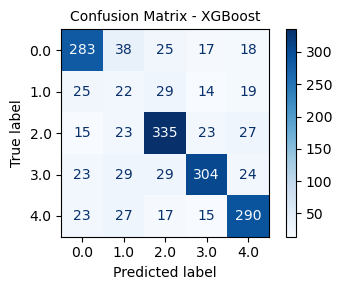

Accuracy: 0.7284533648170012
F1-score: 0.7336813930947996


In [266]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

xgb_clf = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42
)

xgb_clf.fit(X_train_model, y_train)
y_pred = xgb_clf.predict(X_test_model)

fig, ax = plt.subplots(figsize=(4,3))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap='Blues',
    ax=ax
)

ax.set_title("Confusion Matrix - XGBoost", fontsize=10)
plt.tight_layout()
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))


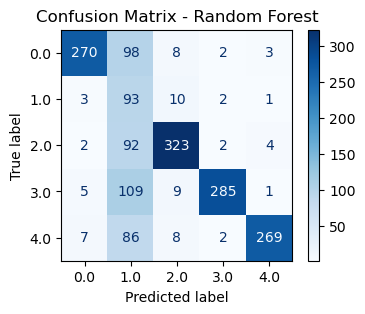

Accuracy: 0.731995277449823
F1-score: 0.7865466944099045


In [267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
rf_clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train_model, y_train)
rf_pred = rf_clf.predict(X_test_model)
fig, ax = plt.subplots(figsize=(4,3))
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred,cmap='Blues',ax=ax)
plt.title("Confusion Matrix - Random Forest")
plt.show()
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("F1-score:", f1_score(y_test, rf_pred, average='weighted'))
